# Exploratory Data Analysis

Data is in csv file and has been imported from Kaggle.com

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("loan_dataset.csv")

## Data summary before cleaning

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.shape

(614, 13)

In [7]:
data['Gender'].value_counts().plot.bar()

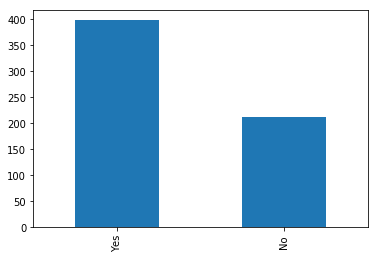

In [8]:
data['Married'].value_counts().plot.bar()

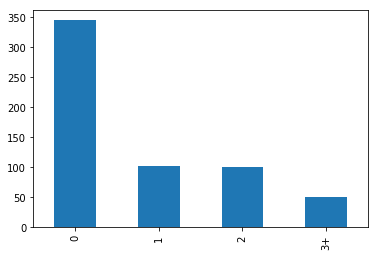

In [9]:
data['Dependents'].value_counts().plot.bar()

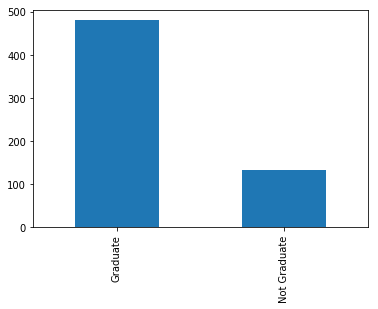

In [10]:
data['Education'].value_counts().plot.bar()

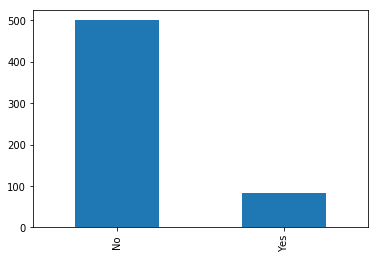

In [11]:
data['Self_Employed'].value_counts().plot.bar()

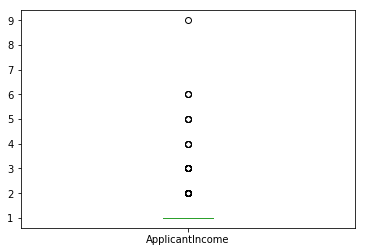

In [12]:
data['ApplicantIncome'].value_counts().plot.box()

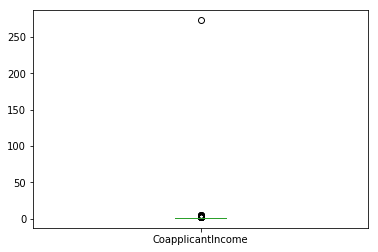

In [13]:
data['CoapplicantIncome'].value_counts().plot.box()

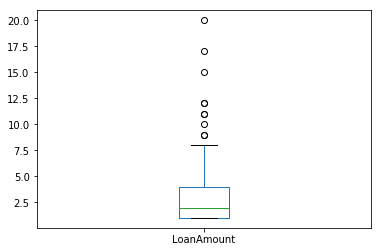

In [14]:
data['LoanAmount'].value_counts().plot.box()

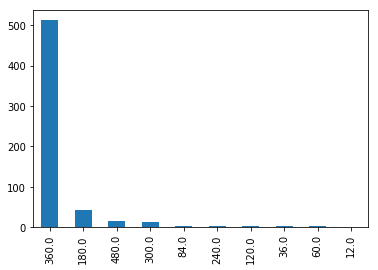

In [15]:
data['Loan_Amount_Term'].value_counts().plot.bar()

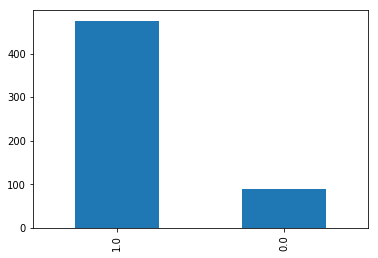

In [16]:
data['Credit_History'].value_counts().plot.bar()

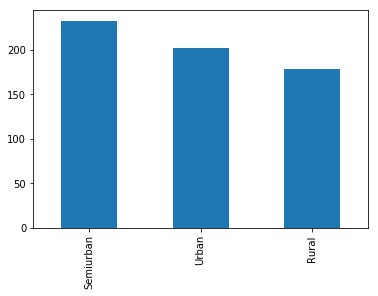

In [17]:
data['Property_Area'].value_counts().plot.bar()

In [18]:
print(pd.crosstab(data['Gender'], data['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


In [19]:
import matplotlib.pyplot as plt

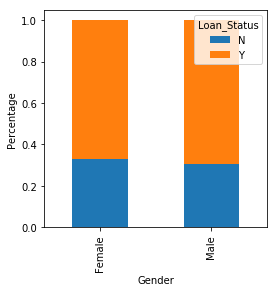

In [20]:
Gender = pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

In [21]:
print(pd.crosstab(data['Dependents'],data['Loan_Status']))

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


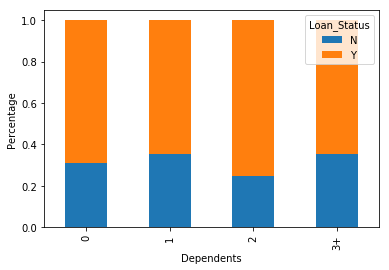

In [22]:
Dependents=pd.crosstab(data['Dependents'], data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

In [23]:
print(pd.crosstab(data['Education'], data['Loan_Status']))

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


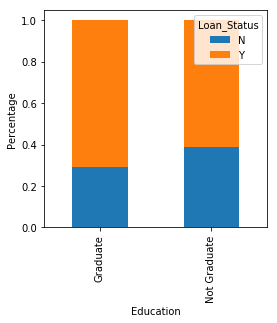

In [24]:
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

In [25]:
print(pd.crosstab(data['Self_Employed'],data['Loan_Status']))

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


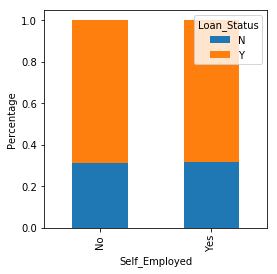

In [26]:
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

In [27]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


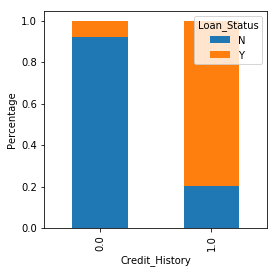

In [28]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

In [29]:
print(pd.crosstab(data['Property_Area'],data['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


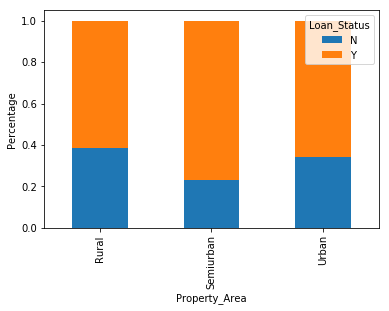

In [30]:
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [31]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data cleaning

In [32]:
data.dropna(subset=['Credit_History','Married', 'Gender', 'LoanAmount', 'Dependents' ], axis=0, inplace = True)

In [33]:
data['Loan_Amount_Term'].fillna(360, inplace = True)

In [34]:
data['Self_Employed'].fillna('No', inplace = True)

## Data summary after cleaning

In [35]:
data.shape

(518, 13)

In [36]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [38]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,518.00000,518.000000,518.000000,518.000000,518.000000
mean,5376.65251,1561.880154,143.944015,342.324324,0.851351
std,6060.55897,2542.865925,80.518645,64.142032,0.356086
min,150.00000,0.000000,9.000000,36.000000,0.000000
25%,2894.25000,0.000000,100.000000,360.000000,1.000000
50%,3813.00000,1146.500000,126.000000,360.000000,1.000000
75%,5811.25000,2269.750000,165.750000,360.000000,1.000000
max,81000.00000,33837.000000,600.000000,480.000000,1.000000


In [39]:
import  seaborn as sns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116021,0.524060,-0.057908,-0.040877
CoapplicantIncome,-0.116021,1.000000,0.180111,0.002439,-0.002933
LoanAmount,0.524060,0.180111,1.000000,0.030984,-0.022688
Loan_Amount_Term,-0.057908,0.002439,0.030984,1.000000,0.021931
Credit_History,-0.040877,-0.002933,-0.022688,0.021931,1.000000


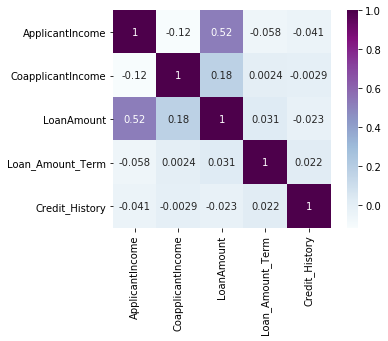

In [40]:
matrix = data.corr(method ='pearson')
sns.heatmap(matrix, vmax = 1, square = True, cmap = "BuPu", annot = True)
matrix

### there is not signficant correlation between independent variables so no need to remove any independent varables